In [3]:
# Municipality Model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
mdata = pd.read_csv('new_municipalities_with_wages.csv')
mdata.columns = mdata.columns.str.replace(' ', '_')

# Clean the data
mdata = mdata.drop(columns=["Salary_Paid", "Taxable_Benefits", "Sector", "Employer"])
mdata['Job_Title'] = mdata['Job_Title'].astype('category')
mdata = mdata.dropna()

# Remove Outliers in Total Compensation
Q1 = mdata["Total_Compensation"].quantile(0.05)
Q3 = mdata["Total_Compensation"].quantile(0.95)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mdata_cleaned = mdata[(mdata["Total_Compensation"] >= lower_bound) & (mdata["Total_Compensation"] <= upper_bound)]

# Define X and y
X = mdata_cleaned.drop(columns="Total_Compensation")
y = mdata_cleaned["Total_Compensation"]

X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Include Interactions
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model's performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
r_squared_poly = r2_score(y_test, y_pred_poly)
rmse=mse_poly ** 0.5
print("Municipalities MSE with interaction terms:", mse_poly)
print("Municipalities RMSE with interaction terms:", rmse)
print("R-squared with interaction terms:", r_squared_poly)


Municipalities MSE with interaction terms: 294591320.72742337
Municipalities RMSE with interaction terms: 17163.662800446276
R-squared with interaction terms: 0.16267798347706586


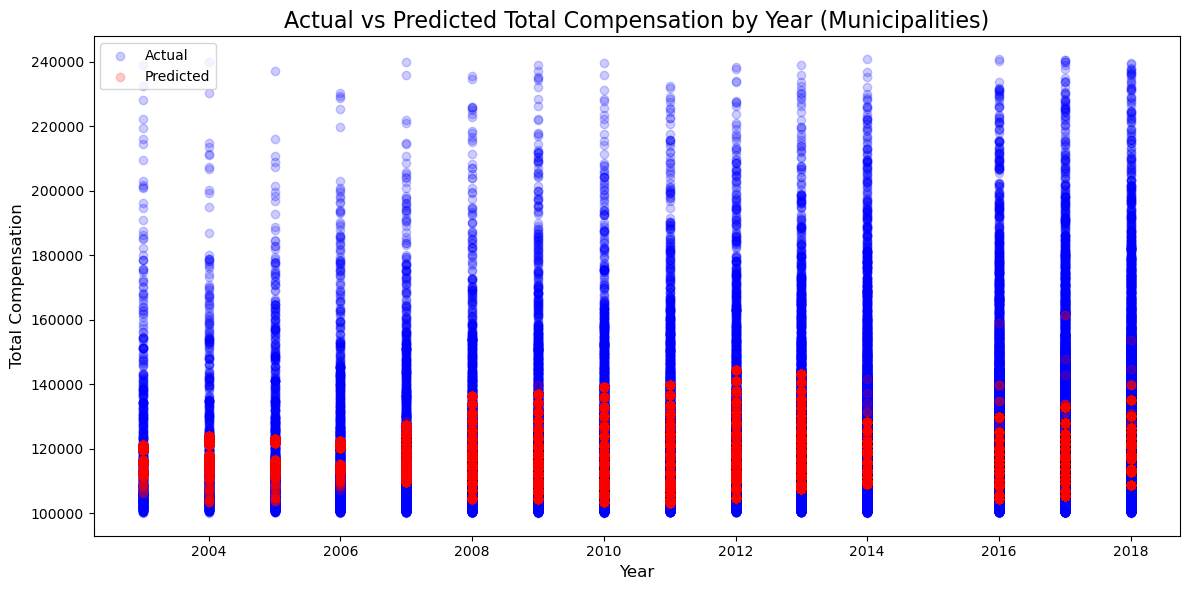

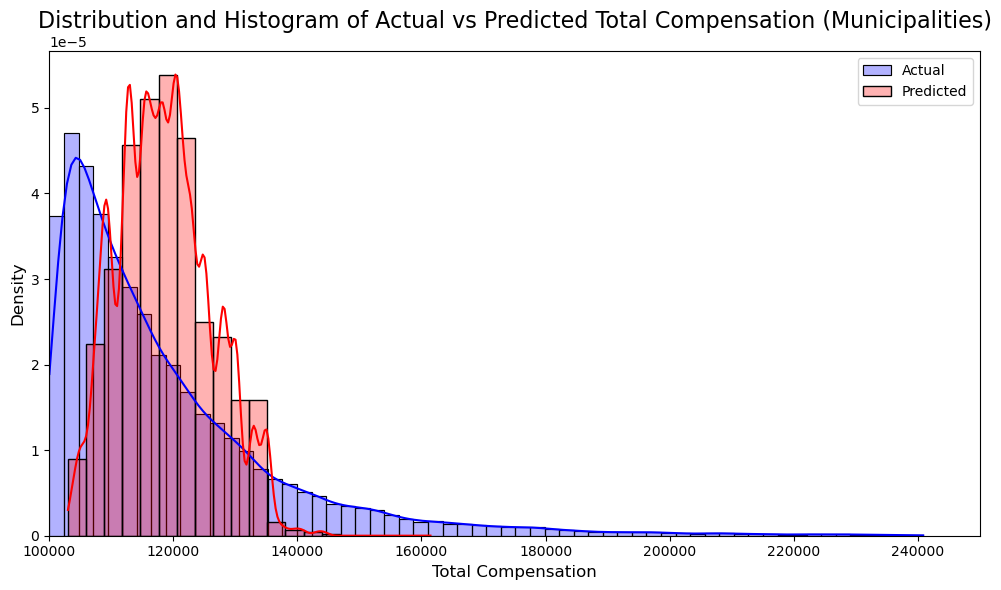

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


df_predictions = pd.DataFrame({
    'Year': mdata.loc[X_test.index, 'Calendar_Year'],
    'Actual': y_test,
    'Predicted': y_pred_poly
})

# Create a scatter plot for Actual vs Predicted values by Year
plt.figure(figsize=(12, 6))

plt.scatter(df_predictions['Year'], df_predictions['Actual'], label='Actual', color='blue', alpha=0.2, marker='o')
plt.scatter(df_predictions['Year'], df_predictions['Predicted'], label='Predicted', color='red', alpha=0.2, marker='o')

plt.title("Actual vs Predicted Total Compensation by Year (Municipalities)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Compensation", fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()

# Create a distribution plot with histograms for Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.histplot(df_predictions['Actual'], label='Actual', color='blue', bins=60, kde=True, stat="density", alpha=0.3)
sns.histplot(df_predictions['Predicted'], label='Predicted', color='red', bins=20, kde=True, stat="density", alpha=0.3)

plt.xlim(100000, 250000)
plt.title("Distribution and Histogram of Actual vs Predicted Total Compensation (Municipalities)", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()


In [5]:
#School Board Model

# Load the data
mdata = pd.read_csv('new_school_with_wages.csv')
mdata.columns = mdata.columns.str.replace(' ', '_')

# Clean the data 
mdata = mdata.drop(columns=["Salary_Paid", "Taxable_Benefits", "Sector", "Employer"])
mdata['Job_Title'] = mdata['Job_Title'].astype('category')
mdata = mdata.dropna()

# Remove Outliers
Q1 = mdata["Total_Compensation"].quantile(0.05)
Q3 = mdata["Total_Compensation"].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mdata_cleaned = mdata[(mdata["Total_Compensation"] >= lower_bound) & (mdata["Total_Compensation"] <= upper_bound)]

# Define X and y 
X = mdata_cleaned.drop(columns="Total_Compensation")
y = mdata_cleaned["Total_Compensation"]
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Include interactions
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model's performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
r_squared_poly = r2_score(y_test, y_pred_poly)
rmse=mse_poly ** 0.5
print("School Board MSE with interaction terms:", mse_poly)
print("School Board RMSE with interaction terms:", rmse)
print("School Board R-squared with interaction terms:", r_squared_poly)


School Board MSE with interaction terms: 159844197.1641332
School Board RMSE with interaction terms: 12642.950492829323
School Board R-squared with interaction terms: 0.21115685836008435


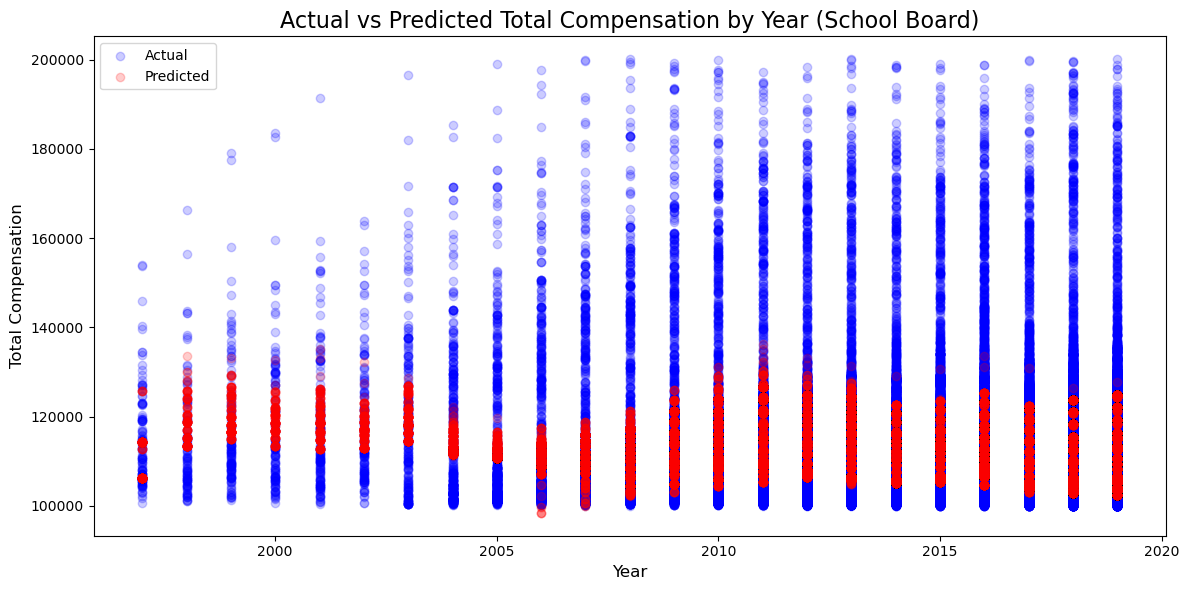

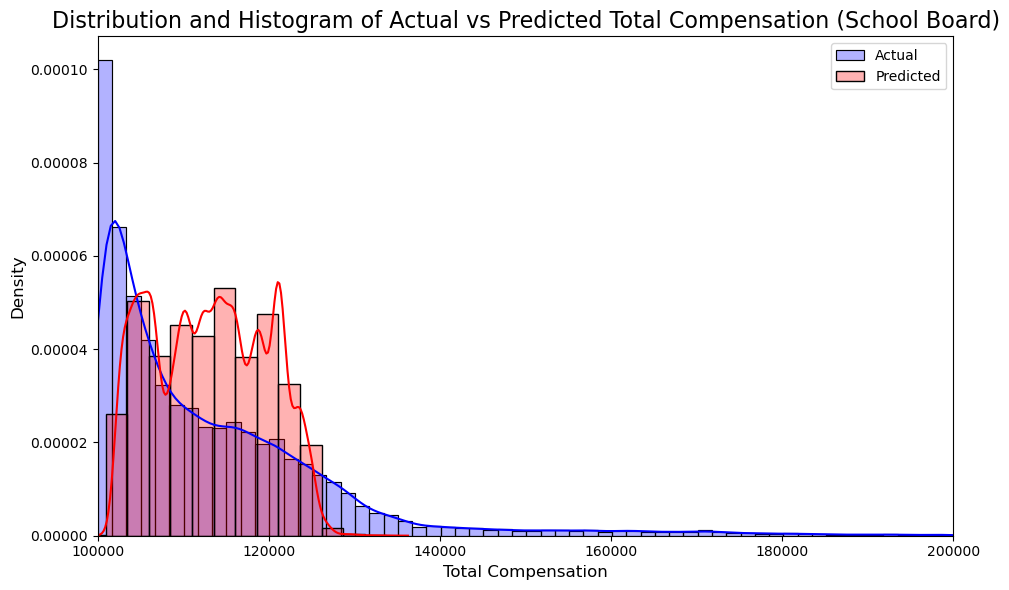

In [ ]:
df_predictions = pd.DataFrame({
    'Year': mdata.loc[X_test.index, 'Calendar_Year'],
    'Actual': y_test,
    'Predicted': y_pred_poly
})

# Create a scatter plot for Actual vs Predicted values by Year
plt.figure(figsize=(12, 6))

plt.scatter(df_predictions['Year'], df_predictions['Actual'], label='Actual', color='blue', alpha=0.2, marker='o')
plt.scatter(df_predictions['Year'], df_predictions['Predicted'], label='Predicted', color='red', alpha=0.2, marker='o')
plt.title("Actual vs Predicted Total Compensation by Year (School Board)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Compensation", fontsize=12)
plt.legend()


plt.tight_layout()
plt.show()

# Create a distribution plot with histograms for Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.histplot(df_predictions['Actual'], label='Actual', color='blue', bins=60, kde=True, stat="density", alpha=0.3)
sns.histplot(df_predictions['Predicted'], label='Predicted', color='red', bins=15, kde=True, stat="density", alpha=0.3)
plt.xlim(100000, 200000)
plt.title("Distribution and Histogram of Actual vs Predicted Total Compensation (School Board)", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
#Hospital Model

# Load the data 
mdata = pd.read_csv('new_hospital_with_wages.csv')
mdata.columns = mdata.columns.str.replace(' ', '_')

# Clean the data 
mdata = mdata.drop(columns=["Salary_Paid", "Taxable_Benefits", "Sector", "Employer"])
mdata['Job_Title'] = mdata['Job_Title'].astype('category')
mdata = mdata.dropna()

#  Remove Outliers 
Q1 = mdata["Total_Compensation"].quantile(0.1)
Q3 = mdata["Total_Compensation"].quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mdata_cleaned = mdata[(mdata["Total_Compensation"] >= lower_bound) & (mdata["Total_Compensation"] <= upper_bound)]

# Define X  and y 
X = mdata_cleaned.drop(columns="Total_Compensation")
y = mdata_cleaned["Total_Compensation"]
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Include interactions
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model's performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse = mse_poly ** 0.5
r_squared_poly = r2_score(y_test, y_pred_poly)

print("Model performance after removing outliers:")
print(f"MSE: {mse_poly}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared_poly}")


Model performance after removing outliers:
MSE: 1771184993.0747848
RMSE: 42085.44870943857
R-squared: 0.24135152956130268


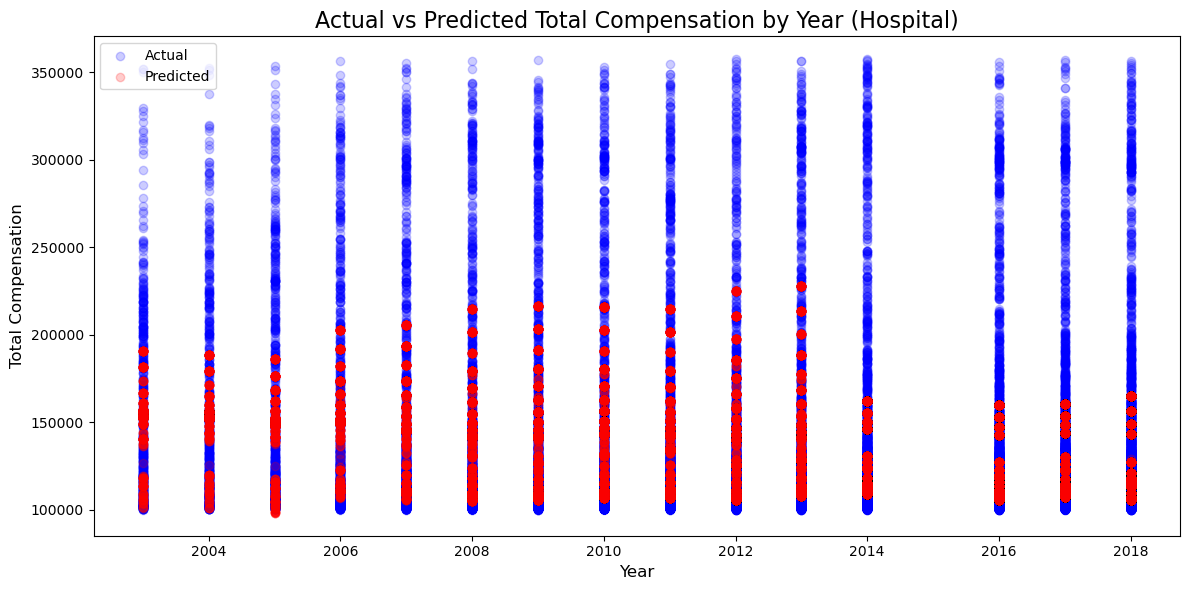

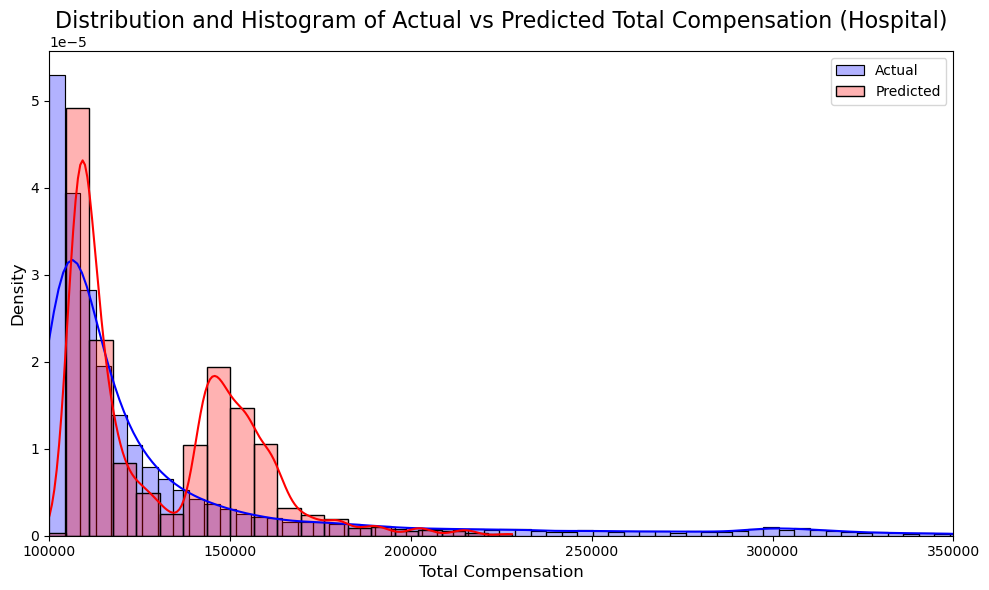

In [8]:

df_predictions = pd.DataFrame({
    'Year': mdata.loc[X_test.index, 'Calendar_Year'],
    'Actual': y_test,
    'Predicted': y_pred_poly
})

# Create a scatter plot for Actual vs Predicted values by Year
plt.figure(figsize=(12, 6))

plt.scatter(df_predictions['Year'], df_predictions['Actual'], label='Actual', color='blue', alpha=0.2, marker='o')
plt.scatter(df_predictions['Year'], df_predictions['Predicted'], label='Predicted', color='red', alpha=0.2, marker='o')
plt.title("Actual vs Predicted Total Compensation by Year (Hospital)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Compensation", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Create a distribution plot with histograms for Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.histplot(df_predictions['Actual'], label='Actual', color='blue', bins=60, kde=True, stat="density", alpha=0.3)
sns.histplot(df_predictions['Predicted'], label='Predicted', color='red', bins=20, kde=True, stat="density", alpha=0.3)
plt.xlim(100000, 350000)
plt.title("Distribution and Histogram of Actual vs Predicted Total Compensation (Hospital)", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
